In [1]:
from Bio import SeqIO

In [2]:
# load dna sequence into a list
nucleotide = SeqIO.parse('SouthAsia.fasta','fasta')
nucleotide_data = []
for sequence in nucleotide:
    nucleotide_data.append(str(sequence.seq))

In [3]:
# find max length of the sequence
max_len = 0
for data in nucleotide_data:
    if len(data) > max_len:
        max_len = len(data)
print(max_len)

29903


In [4]:
# extend the string to same length (max_len)
for i in range(0, len(nucleotide_data)):
    nucleotide_data[i] = nucleotide_data[i].ljust(max_len, 'N')

In [5]:
# split string to string
for i in range(0, len(nucleotide_data)):
    nucleotide_data[i] = [char for char in nucleotide_data[i]]

In [38]:
#import for ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Input
from keras import optimizers

from sklearn.preprocessing import MinMaxScaler

In [39]:
#encoding data with numbers

nucleic_acid_encoding = {
    'A': 0,
    'G': 1,
    'C': 2,
    'T': 3,
    'Y': 4,
    'M': 5,
    'S': 6,
    'K': 7,
    'R': 8,
    'W': 9,
    'N': 10
}

encoded_nucleotide = []
for i in range(0, len(nucleotide_data)):
    encoded_nucleotide.append([])
    for j in range(0, max_len):
        encoded_nucleotide[i].append(nucleic_acid_encoding[nucleotide_data[i][j]])

encoded_nucleotide = np.array(encoded_nucleotide)
scaler = MinMaxScaler()
encoded_nucleotide = scaler.fit_transform(encoded_nucleotide)

In [54]:
# building autoencoder

encoding_dim1 = 256
encoding_dim2 = 128
encoding_dim3 = 16
bottleneck_dim = 3
decoding_dim3 = 16
decoding_dim2 = 128
decoding_dim1 = 256

input_data = Input(shape=encoded_nucleotide.shape[1])
encoded1 = Dense(encoding_dim1, activation='relu')(input_data)
encoded2 = Dense(encoding_dim2, activation='relu')(encoded1)
encoded3 = Dense(encoding_dim3, activation='relu')(encoded2)
bottleneck = Dense(bottleneck_dim, activation='relu', name='bottleneck_layer')(encoded3)
decoded3 = Dense(decoding_dim3, activation='relu')(bottleneck)
decoded2 = Dense(decoding_dim2, activation='relu')(decoded3)
decoded1 = Dense(decoding_dim1, activation='relu')(decoded2)
decoded_data = Dense(encoded_nucleotide.shape[1], activation='sigmoid')(decoded1)

autoencoder = Model(input_data, decoded_data)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError())

hist_auto = autoencoder.fit(encoded_nucleotide, encoded_nucleotide, epochs=100,
                           batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/100
26/26 [==============================] - 3s 75ms/step - loss: 0.0592 - val_loss: 0.0537
Epoch 2/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0203 - val_loss: 0.0528
Epoch 3/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0057 - val_loss: 0.0528
Epoch 4/100
26/26 [==============================] - 2s 69ms/step - loss: 0.0068 - val_loss: 0.0476
Epoch 5/100
26/26 [==============================] - 2s 69ms/step - loss: 0.0051 - val_loss: 0.0496
Epoch 6/100
26/26 [==============================] - 2s 67ms/step - loss: 0.0054 - val_loss: 0.0492
Epoch 7/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0049 - val_loss: 0.0467
Epoch 8/100
26/26 [==============================] - 2s 69ms/step - loss: 0.0049 - val_loss: 0.0442
Epoch 9/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0045 - val_loss: 0.0446
Epoch 10/100
26/26 [==============================] - 2s 67ms/step - loss: 0.0052 - val_loss: 0.0442

26/26 [==============================] - 2s 73ms/step - loss: 0.0033 - val_loss: 0.0166
Epoch 83/100
26/26 [==============================] - 2s 71ms/step - loss: 0.0030 - val_loss: 0.0169
Epoch 84/100
26/26 [==============================] - 2s 73ms/step - loss: 0.0033 - val_loss: 0.0166
Epoch 85/100
26/26 [==============================] - 2s 72ms/step - loss: 0.0033 - val_loss: 0.0161
Epoch 86/100
26/26 [==============================] - 2s 72ms/step - loss: 0.0031 - val_loss: 0.0164
Epoch 87/100
26/26 [==============================] - 2s 73ms/step - loss: 0.0034 - val_loss: 0.0171
Epoch 88/100
26/26 [==============================] - 2s 71ms/step - loss: 0.0036 - val_loss: 0.0160
Epoch 89/100
26/26 [==============================] - 2s 72ms/step - loss: 0.0029 - val_loss: 0.0160
Epoch 90/100
26/26 [==============================] - 2s 72ms/step - loss: 0.0024 - val_loss: 0.0162
Epoch 91/100
26/26 [==============================] - 2s 69ms/step - loss: 0.0027 - val_loss: 0.0168
Epo

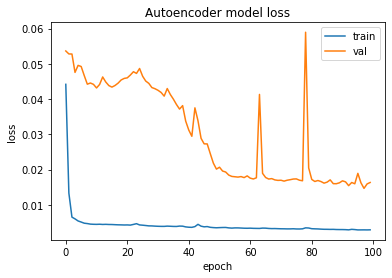

In [55]:
# plot training history

plt.figure()
plt.plot(hist_auto.history['loss'])
plt.plot(hist_auto.history['val_loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [56]:
autoencoder.summary() # autoencoder architecture

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 29903)]           0         
_________________________________________________________________
dense_278 (Dense)            (None, 256)               7655424   
_________________________________________________________________
dense_279 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_280 (Dense)            (None, 16)                2064      
_________________________________________________________________
bottleneck_layer (Dense)     (None, 3)                 51        
_________________________________________________________________
dense_281 (Dense)            (None, 16)                64        
_________________________________________________________________
dense_282 (Dense)            (None, 128)               217

In [57]:
# build another model that outputs 3 dimensional data

encoded_layer = Model(inputs=autoencoder.input,
               outputs=autoencoder.get_layer('bottleneck_layer').output)

In [58]:
# crearte new dataset with 3 dimensional data

encoded_data = []
for sequence in encoded_nucleotide:
    encoded_data.append(encoded_layer.predict(np.array([sequence,]))[0])


In [59]:
# import for clustering

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [65]:
# determine the optimal number of clusters using elbow method

inertia = []
K = range(1,11)
for k in K:
    km = KMeans(init='k-means++', n_clusters=k, n_init=10)
    km.fit(encoded_data)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [66]:
# create a dataset for visualizing clusters

kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(encoded_data)
P = kmeans.predict(encoded_data)

In [67]:
# plot 3D graph of clusters

%matplotlib
encoded_fig = plt.figure()
ax = Axes3D(encoded_fig)
p = ax.scatter([row[0] for row in encoded_data], 
               [row[1] for row in encoded_data], 
               [row[2] for row in encoded_data], 
               c=P, marker="o", picker=True, cmap="rainbow")
plt.colorbar(p, shrink=0.5)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

Using matplotlib backend: Qt5Agg
